In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np

# 假设检验

用来判断样本与总体、样本与样本之间的差异是由于抽样误差还是本质差别造成的统计方法。

保证组间可比性；根据研究目的、资料类型和设计类型选用适当的检验方法，熟悉各种检验方法的应用条件；“显著与否”是统计学术语，为“有无统计学意义”，不能理解为“差别是不是大”；结论不能绝对化。

## 思想
### 小概率思想
小概率事件在一次试验中基本不会发生，$P < 0.05$

### 反证法思想


### 小概率反证法思想

## 基本步骤
1. 提出假设检验 
    - H0 两总体均数相等 （原假设，无效假设，检验假设）
    - H1 两总体均数不等 （被择假设）
2. 设定检验水准 $\alpha$, usu. one-tail: 0.025, two-tail: 0.05
3. 选择单双侧检验
4. 选择监测方法，并计算统计量
5. 计算拒绝范围与非拒绝范围

## t值、P值与统计结论

|$\alpha$|abs(t)|p|conclusion|
|--------|------|-|----------|
|0.05    |$< t_{1/2, \nu}$|>0.05|accept H0, 差别无统计学意义|
|0.05    |$\ge t_{1/2, \nu}$|$\le 0.05$|reject H0, 差别有统计学意义|
|0.01    |$\ge t_{0.01, \nu}$|$\le 0.01$|reject H0, 差别有高度统计学意义|


u检验和t检验用于样本均数与总体均数的比较。理论上要求样本来自正态分布总体实际中，只要样本例数n较大，或n小但总体标准差σ已知，就选用u检验。n较小且σ未知时，用于t检验。两样本均数比较时还要求两总体方差等。

# u检验
总体sigma已知或n足够大

计算u值
$$ u = \frac{\bar{x} - \mu_0}{\sigma_{\bar{x}}} = \frac{\bar{x} - \mu_0}{\dfrac{\sigma}{\sqrt{n}}}$$

计算临界值:

|u|$\alpha$|
|-|--------|
|2.58| 0.01|
|1.96| 0.05|
|1.65| 0.1 |

# t检验
- sigma未知n较小
- 来自正态分布
- 双样本时方差要相近

计算t值
$$ t = \frac{\bar{x} - \mu_0}{S / \sqrt{n}} $$

查询临界值 $t(\nu)$

当n较大时，也可用u检验
当x为未知分布，则采用秩和检验

# 二类错误

弃真，拒绝正确的H0为Ⅰ型错误α表示，若显著性水平α定为0.05，则犯Ⅰ型错误的概率0.05；接受错误的H0为Ⅱ型错误，概率用β表示，β值的大小很难确切估计。当样本含量一定时，两者反比，增大n，当α一定时，可减少β。1-β称为**检验效能或把握度**，其统计意义是若两总体确有差别，按α水准能检出其差别的能力。

|| H0 is true | H1 is true|
|-|------------|-----------|
|reject H0|$\alpha$ (type I) | $1-\beta$ |
|accept H0|$1 - \alpha$|$\beta$ (type II)|

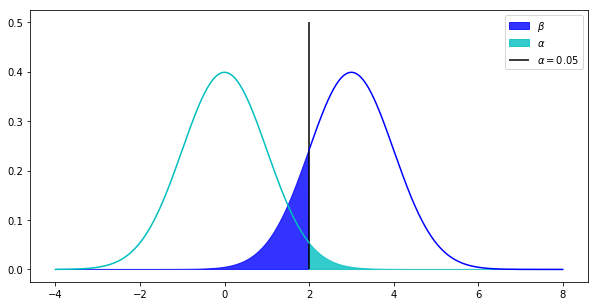

In [33]:
N0 = scipy.stats.norm(loc=0, scale=1)
N1 = scipy.stats.norm(loc=3, scale=1)

X0 = np.linspace(-4,2,1000)
X1 = np.linspace(2,8,1000)


Y1 = N0.pdf(X0)
Y2 = N1.pdf(X0)
Y1.put([0,-1],[0,Y1[-1]])
Y2.put([0,-1],[0,0])
X0.put([0,-1], [X0[0], X0[-1]])

Y3 = N0.pdf(X1)
Y4 = N1.pdf(X1)
Y3.put([0,-1],[0,0])
Y4.put([0,-1],[Y4[0],0])
X1.put([0,-1], [X1[0], X1[-1]])

plt.figure(figsize=(10,5))

plt.plot(X0, Y1, color='c')
plt.fill(X0, Y2, alpha=0.8, color='b', label="$\\beta$")

plt.plot(X1, Y4, color='b')
plt.fill(X1, Y3, alpha=0.8, color='c', label="$\\alpha$")

plt.vlines([2],0,0.5, label="$\\alpha=0.05$")
plt.legend()
plt.show()

## 可信区间与假设检验

可信区间为量化指标，亦可用于回答假设检验的问题，同时包含更多的信息。